<a href="https://colab.research.google.com/github/DebjitHore/TensorflowDeveloperUdemy/blob/main/03_CNNTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Binary Classification

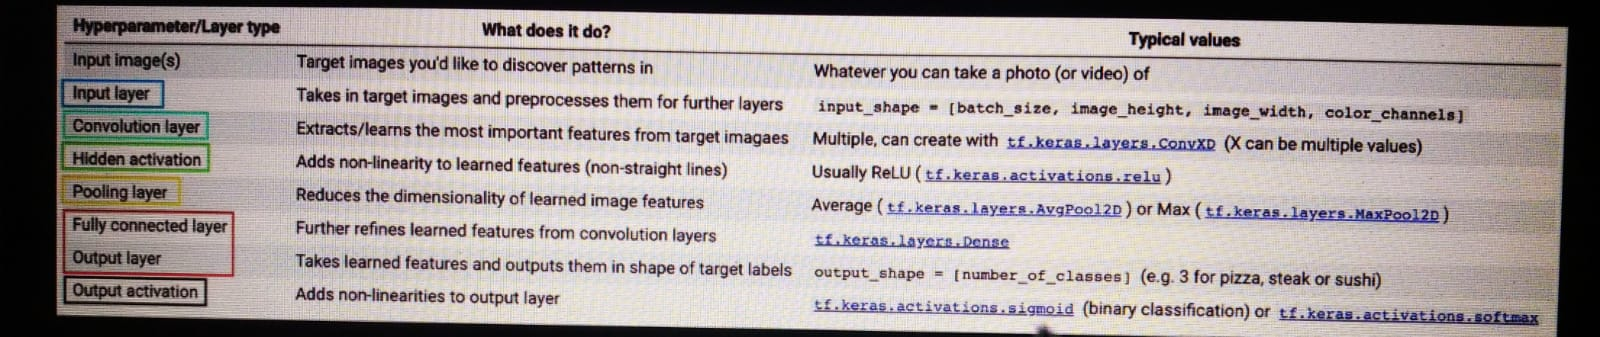

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import random
import matplotlib.image as mpimg

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-16 17:41:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   254MB/s    in 0.4s    

2022-07-16 17:41:30 (254 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect and Visualise the Data

In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

#Walk through pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Find images in file alternative

num_steak_images_train= len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
data_dir= pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualise images
def view_random_image(target_dir, target_class):
  target_folder= target_dir+target_class

  #random path
  random_image= random.sample(os.listdir(target_folder),1)

  #read images and plot it using matplotlib

  img= mpimg.imread(target_folder+"/"+random_image[0])

  plt.imshow(img)

  plt.title(target_class)

  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


array([[[217, 230, 247],
        [217, 230, 247],
        [217, 230, 247],
        ...,
        [187, 213, 236],
        [186, 212, 235],
        [185, 211, 234]],

       [[217, 230, 247],
        [217, 230, 247],
        [218, 231, 248],
        ...,
        [188, 214, 237],
        [187, 213, 236],
        [186, 212, 235]],

       [[218, 231, 248],
        [218, 231, 248],
        [218, 231, 248],
        ...,
        [190, 216, 239],
        [189, 215, 238],
        [188, 214, 237]],

       ...,

       [[149, 141, 139],
        [148, 140, 138],
        [147, 139, 137],
        ...,
        [202, 220, 230],
        [203, 221, 231],
        [206, 224, 234]],

       [[149, 141, 139],
        [149, 141, 139],
        [149, 141, 139],
        ...,
        [203, 220, 230],
        [205, 222, 232],
        [205, 222, 230]],

       [[149, 141, 139],
        [150, 142, 140],
        [150, 142, 140],
        ...,
        [203, 220, 230],
        [204, 221, 229],
        [200, 217, 225]]

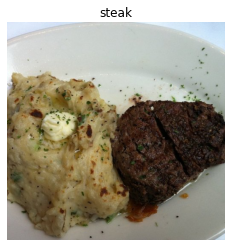

In [ ]:
view_random_image(target_dir='pizza_steak/train/',
                  target_class='steak')

## Scaling the pixel values 
*Building an end-to-end example to 
  * Load our images
  * Preprocess 
  * Build CNN 
  * Compile our CNN
  * Fit CNN to our training data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

#Preprocess Data (get all pixel values between 0 & 1)
train_datagen= ImageDataGenerator(rescale= 1./255)
valid_datagen= ImageDataGenerator(rescale= 1./255)

#setup paths to our data directories 

train_dir= "/content/pizza_steak/train"
test_dir= "/content/pizza_steak/test"

#import data from directories and turn it into batches
train_data= train_datagen.flow_from_directory(directory= train_dir, batch_size=32, target_size= (224,224),
                                              class_mode='binary', seed=42)

valid_data= valid_datagen.flow_from_directory(directory=test_dir,  batch_size=32, target_size= (224,224),
                                              class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Building the CNN 

In [ ]:
model_1= tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=10, 
                                                     kernel_size=3,
                                                     activation='relu',
                                                     input_shape= (224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size= 2,
                                                        padding='valid'),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size= 2,
                                                        padding='valid'),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1, activation='sigmoid')
                              ])

model_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ['accuracy'])

In [ ]:
history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 220ms/step - loss: 0.5931 - accuracy: 0.6700 - val_loss: 0.3858 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4373 - accuracy: 0.8107 - val_loss: 0.3528 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3851 - accuracy: 0.8340 - val_loss: 0.3108 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3431 - accuracy: 0.8580 - val_loss: 0.3237 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3252 - accuracy: 0.8693 - val_loss: 0.3434 - val_accuracy: 0.8500


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using NN_Classification models with pizza_steak dataset

In [ ]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(1, activation='softmax'),
])

model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2= model_2.fit(train_data, epochs=10, steps_per_epoch= len(train_data), validation_data= valid_data, validation_steps= len(valid_data))

Epoch 1/10
47/47 [==============================] - 10s 197ms/step - loss: nan - accuracy: 0.4947 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 9s 190ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 9s 191ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 9s 191ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 9s 191ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 9s 195ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 9s 188ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
47/47 [=============================

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


*Even without almost 20x the number of parameters a ANN is simply guessing*

## Improving our ANN Model 

In [ ]:
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
                            
                            tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3= model_3.fit(train_data, epochs=10, steps_per_epoch= len(train_data), validation_data= valid_data, validation_steps= len(valid_data))

Epoch 1/10
47/47 [==============================] - 10s 195ms/step - loss: 2.6940 - accuracy: 0.6387 - val_loss: 2.2160 - val_accuracy: 0.5040
Epoch 2/10
47/47 [==============================] - 10s 209ms/step - loss: 0.7680 - accuracy: 0.7127 - val_loss: 0.7132 - val_accuracy: 0.6720
Epoch 3/10
47/47 [==============================] - 9s 190ms/step - loss: 0.5999 - accuracy: 0.7447 - val_loss: 0.4550 - val_accuracy: 0.7820
Epoch 4/10
47/47 [==============================] - 9s 190ms/step - loss: 0.5756 - accuracy: 0.7433 - val_loss: 0.4296 - val_accuracy: 0.7960
Epoch 5/10
47/47 [==============================] - 9s 190ms/step - loss: 0.5575 - accuracy: 0.7680 - val_loss: 0.5734 - val_accuracy: 0.7580
Epoch 6/10
47/47 [==============================] - 9s 189ms/step - loss: 0.4578 - accuracy: 0.7913 - val_loss: 0.4116 - val_accuracy: 0.8160
Epoch 7/10
47/47 [==============================] - 9s 190ms/step - loss: 0.4227 - accuracy: 0.8260 - val_loss: 0.4776 - val_accuracy: 0.7780
Epoc

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


*Inspite of having 500 times the amount of parameters as the CNN, the ANN does not perform nearly as well as it expected to*

## Binary Classification : Breaking it down.
* Visualise data
* Preprocess 
* Create model
* Fit model
* Evaluate model
* Tune hyperparameters, improve model
* Repeat

### Visualise

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 511, 3)
Image shape: (384, 512, 3)


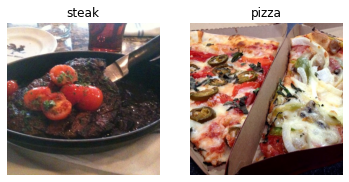

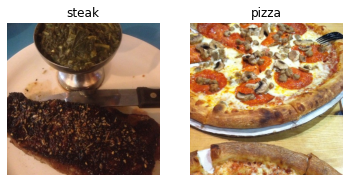

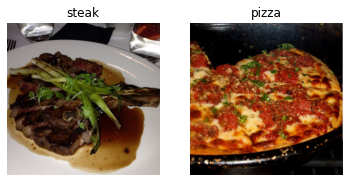

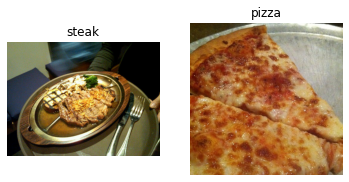

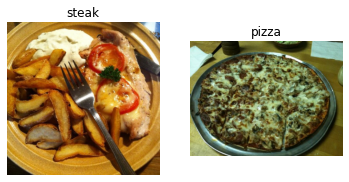

In [ ]:
for i in range(0,5):
  plt.figure()
  plt.subplot(1,2,1)
  steak_image=  view_random_image("pizza_steak/train/",  'steak')
  plt.subplot(1,2,2)
  pizza_image=  view_random_image("pizza_steak/train/",  'pizza')

### Preprocess
* Turn data into numbers (tensors)
* Tensors should be of the same shape
* Scale features

In [ ]:
# Define directory dataset paths
train_dir= "pizza_steak/train/"
test_dir= 'pizza_steak/test'

In [ ]:
!nvidia-smi

Sat Jul 16 17:46:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# turning data into batches of 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

train_data= train_datagen.flow_from_directory(directory= train_dir, batch_size=32, target_size= (224,224),
                                              class_mode='binary', seed=42)
test_data= test_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224),
                                            seed=42, class_mode= 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Create a model

In [ ]:
# make the creation of CNN model a little easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create model (baseline, a 3 layer CNN)
tf.random.set_seed(42)
model_4= Sequential([
                     Conv2D(filters=10, 
                            kernel_size=3,  #filter size
                            strides=1, 
                            padding='valid', #if 'same' input and output shapes are same, if 'valid' output is compressed
                            activation='relu',
                            input_shape=(224,224,3)), #input layer specify image shape
                     Conv2D(10,3, activation='relu'),
                     Conv2D(10,3, activation='relu'),
                     Flatten(),
                     Dense(1, activation='sigmoid')  #output layer for binary classification
])




In [ ]:
model_4.compile( loss= tf.keras.losses.binary_crossentropy,
                optimizer= 'Adam',
                metrics=['accuracy'])


In [ ]:
history_4=model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 303ms/step - loss: 0.7400 - accuracy: 0.6593 - val_loss: 0.4776 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 0.4794 - accuracy: 0.7833 - val_loss: 0.4712 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3747 - accuracy: 0.8427 - val_loss: 0.3825 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2796 - accuracy: 0.8973 - val_loss: 0.3910 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.1545 - accuracy: 0.9467 - val_loss: 0.4568 - val_accuracy: 0.7980


In [ ]:
model_1.evaluate(test_data), model_4.evaluate(test_data)


16/16 [==============================] - 2s 141ms/step - loss: 0.4568 - accuracy: 0.7980


([0.34344482421875, 0.8500000238418579],
 [0.45679089426994324, 0.7979999780654907])

* More the number of filters, higher will be the accuracy (analogous to increasing the numbers of neurons in an ANN)
* Kernel size is also filter size, which decides the number of tiles the filter covers (size of sliding window)
* Step size of sliding.
 

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#### Evaluating our baseline model

Text(0.5, 1.0, 'Loss/Accuracy information')

<Figure size 864x648 with 0 Axes>

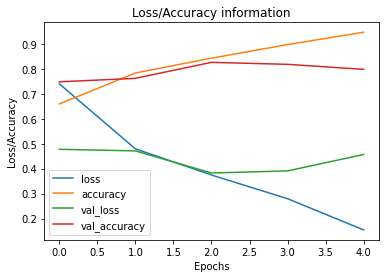

In [ ]:
plt.figure(figsize=(12,9))
pd.DataFrame(history_4.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Loss/Accuracy information')


**Most likely is overfitting, since validation loss is going up halfway through the epochs**

### Adjust/Tune the hyperparameters.

* Reduce overfitting by: 

  * Introduce Overfitting by: 
    * Increase convolutional layers
    * Increase the number of convolutional filters.
    * Add another dense layer to the output of our flattened layer
  * Reduce overfitting by:
    * Add data augmentation 
    * Add regularisation layers such as MaxPool2D
    * Add more data
    

In [ ]:
model_5= Sequential([
                     Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(pool_size=2),
                     Flatten(),
                     Dense(1, activation='sigmoid')

])

In [ ]:
model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
history_5= model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6453 - accuracy: 0.6313 - val_loss: 0.4832 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4689 - accuracy: 0.7887 - val_loss: 0.4074 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 224ms/step - loss: 0.4402 - accuracy: 0.8073 - val_loss: 0.3821 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 19s 408ms/step - loss: 0.4200 - accuracy: 0.8087 - val_loss: 0.3551 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 16s 332ms/step - loss: 0.3835 - accuracy: 0.8327 - val_loss: 0.3474 - val_accuracy: 0.8440


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

#### Evaluating our improved model

Text(0.5, 1.0, 'Loss/Accuracy information')

<Figure size 864x648 with 0 Axes>

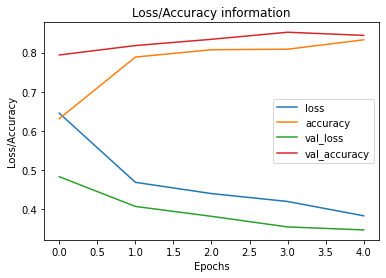

In [ ]:
plt.figure(figsize=(12,9))
pd.DataFrame(history_5.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Loss/Accuracy information')


### Finding Data Augmentation.
* Data augmentation is usually only performed on the training data, not on the test data.

In [ ]:
#Create ImageDataGenerator training instance with data augmentation.

train_Datagen_Augmented= ImageDataGenerator(rescale=1./255,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)
# Create ImageDataGenerator without data augmentation

train_Datagen= ImageDataGenerator(rescale= 1./255)
test_Datagen= ImageDataGenerator(rescale= 1./255)

In [ ]:

train_data= train_Datagen.flow_from_directory(directory=train_dir, target_size=(224,224),
                                              batch_size=32, class_mode='binary',
                                              shuffle= True)
train_dataAugmented = train_Datagen_Augmented.flow_from_directory(directory=train_dir, target_size=(224,224),
                                              batch_size=32, class_mode='binary',
                                              shuffle= True)
test_data= test_Datagen.flow_from_directory(directory=train_dir, target_size=(224,224),
                                              batch_size=32, class_mode='binary',
                                              shuffle= True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
# Use augmented data to train using previous model
history_6= model_5.fit(train_dataAugmented, epochs=10, steps_per_epoch=len(train_dataAugmented),
                       validation_data= test_data, validation_steps= len(test_data))

Epoch 1/10
47/47 [==============================] - 38s 795ms/step - loss: 0.4957 - accuracy: 0.7780 - val_loss: 0.3617 - val_accuracy: 0.8440
Epoch 2/10
47/47 [==============================] - 27s 578ms/step - loss: 0.4692 - accuracy: 0.7867 - val_loss: 0.3484 - val_accuracy: 0.8520
Epoch 3/10
47/47 [==============================] - 28s 603ms/step - loss: 0.4544 - accuracy: 0.7947 - val_loss: 0.3981 - val_accuracy: 0.8300
Epoch 4/10
47/47 [==============================] - 29s 624ms/step - loss: 0.4285 - accuracy: 0.8093 - val_loss: 0.4538 - val_accuracy: 0.8093
Epoch 5/10
47/47 [==============================] - 28s 607ms/step - loss: 0.4445 - accuracy: 0.7973 - val_loss: 0.3481 - val_accuracy: 0.8567
Epoch 6/10
47/47 [==============================] - 27s 580ms/step - loss: 0.4412 - accuracy: 0.7980 - val_loss: 0.3495 - val_accuracy: 0.8527
Epoch 7/10
47/47 [==============================] - 28s 593ms/step - loss: 0.4276 - accuracy: 0.8133 - val_loss: 0.5807 - val_accuracy: 0.7793

Text(0.5, 1.0, 'Loss/Accuracy information')

<Figure size 864x648 with 0 Axes>

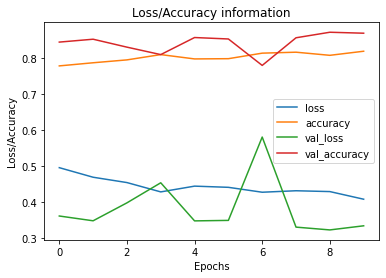

In [ ]:
plt.figure(figsize=(12,9))
pd.DataFrame(history_6.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Loss/Accuracy information')

## Improving the model even further
* Increase number of layer
* Increase number of filters.
* Train for longer
* Find ideal learning rate
* Get more data
* Use **Transfer Learning**
**bold text**

## Making a prediction with custom data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-07-16 17:53:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-07-16 17:53:46 (30.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



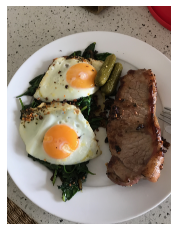

In [ ]:
steak= mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape, steak

((4032, 3024, 3), array([[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],
 
        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],
 
        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],
 
        ...,
 
        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],
 
        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],
 
        [[148, 127, 100],
         [149, 127, 103],
         [114,  94,  70],
         ...,
         [1

### Loading and preprocessing custom images

In [ ]:
tf.expand_dims(steak, axis=0)
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
# Helper function to import an image and resize it to be able to use it with our model

def load_prep_image(filename, img_shape=224):
  #Read in the image
  img= tf.io.read_file(filename)
  #Decode the image
  img= tf.image.decode_image(img)
  #Resize image
  img= tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale image
  img=img/255.
  return img


In [ ]:
steak= load_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred_probability=model_5.predict(tf.expand_dims(steak, axis=0))
pred_probability

array([[0.95608115]], dtype=float32)

Current output is prediction probability, so instead we want a class-name and maybe a visualisation as the model's prediction

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:

pred_class=class_names[int(tf.round(pred_probability))]
pred_class

'steak'

In [ ]:
!wget https://images.unsplash.com/photo-1546964124-0cce460f38ef?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8c3RlYWt8ZW58MHx8MHx8&w=1000&q=80


--2022-07-16 17:53:48--  https://images.unsplash.com/photo-1546964124-0cce460f38ef?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 151.101.186.208, 2a04:4e42:2c::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.186.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13559943 (13M) [image/jpeg]
Saving to: ‘photo-1546964124-0cce460f38ef?ixlib=rb-1.2.1’

photo-1546964124-0c 100%[===================>]  12.93M  --.-KB/s    in 0.1s    

2022-07-16 17:53:48 (129 MB/s) - ‘photo-1546964124-0cce460f38ef?ixlib=rb-1.2.1’ saved [13559943/13559943]



In [ ]:
def predictClass(model, filename, class_names=class_names):
  #prep iamge
  img= load_prep_image(filename)
  #make prediction
  pred_probability= model.predict(tf.expand_dims(img, axis=0))
  #get predicted class
  pred_class=class_names[int(tf.round(pred_probability))]
  #plot
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [ ]:
!wget http://cm1.narvii.com/6874/bcc63b6b6fa12d68d8b0a8488de55282d701df4c_00.jpg

--2022-07-16 17:53:48--  http://cm1.narvii.com/6874/bcc63b6b6fa12d68d8b0a8488de55282d701df4c_00.jpg
Resolving cm1.narvii.com (cm1.narvii.com)... 52.84.52.8, 52.84.52.102, 52.84.52.99, ...
Connecting to cm1.narvii.com (cm1.narvii.com)|52.84.52.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45125 (44K) [image/jpeg]
Saving to: ‘bcc63b6b6fa12d68d8b0a8488de55282d701df4c_00.jpg’

bcc63b6b6fa12d68d8b 100%[===================>]  44.07K  --.-KB/s    in 0.1s    

2022-07-16 17:53:49 (425 KB/s) - ‘bcc63b6b6fa12d68d8b0a8488de55282d701df4c_00.jpg’ saved [45125/45125]



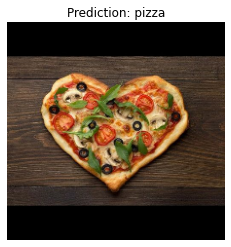

In [ ]:
predictClass(model_5, filename='bcc63b6b6fa12d68d8b0a8488de55282d701df4c_00.jpg')

In [ ]:
!wget https://media-cdn.tripadvisor.com/media/photo-s/05/81/e8/27/usa-usa.jpg

--2022-07-16 17:53:49--  https://media-cdn.tripadvisor.com/media/photo-s/05/81/e8/27/usa-usa.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58890 (58K) [image/jpeg]
Saving to: ‘usa-usa.jpg’

usa-usa.jpg         100%[===================>]  57.51K  --.-KB/s    in 0.01s   

2022-07-16 17:53:49 (5.51 MB/s) - ‘usa-usa.jpg’ saved [58890/58890]



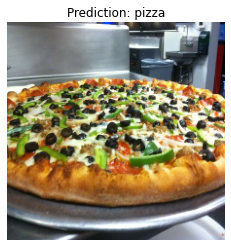

In [ ]:
predictClass(model_5, filename='usa-usa.jpg')

# Multiclass Image Classification using CNN

* Follow the same steps

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip

zip_ref= zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()


--2022-07-16 17:53:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 142.250.1.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   263MB/s    in 1.9s    

2022-07-16 17:53:51 (263 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through the code

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [ ]:
#setup train and test directories
train_dir= '/content/10_food_classes_all_data/train'
test_dir= '/content/10_food_classes_all_data/test'



In [ ]:
#lets get the class names
import pathlib
data_dir= pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


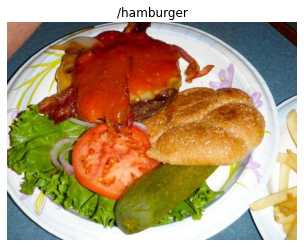

In [ ]:
import random

img= view_random_image(target_dir=train_dir, target_class= '/hamburger')

## Preprocess the Data

In [ ]:
#Rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1./255)
#Load data
train_data= train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                              batch_size=32,
                                              class_mode= 'categorical',
                                              )
test_data= train_datagen.flow_from_directory(test_dir, target_size=(224,224),
                                              batch_size=32,
                                              class_mode= 'categorical',
                                              )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model

In [ ]:
#Create Model (We are mimicking the CNN explainer website hosted CNN)
model_6= Sequential([
                     Conv2D(filters=10, 
                            kernel_size=3,
                            activation='relu',
                            strides=1,
                            input_shape=(224,224,3)),
                     Conv2D(10,3,1, activation='relu'),
                     MaxPool2D(pool_size=2 ),
                     Conv2D(10,3,1, activation='relu'),
                     Conv2D(10,3,1, activation='relu'),
                     MaxPool2D(pool_size=2 ),
                     Flatten(),
                     Dense(10, activation='softmax') #10 output neurons corresponding to 10 output classes
                     
                     
])
#compile model
model_6.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
#fit model

history_New= model_6.fit(train_data,
                         epochs=5,
                         steps_per_epoch= len(train_data),
                         validation_data= test_data,
                         validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 202ms/step - loss: 2.2739 - accuracy: 0.1355 - val_loss: 2.2019 - val_accuracy: 0.1796
Epoch 2/5
235/235 [==============================] - 48s 202ms/step - loss: 2.1114 - accuracy: 0.2408 - val_loss: 2.0540 - val_accuracy: 0.2600
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.6164 - accuracy: 0.4508 - val_loss: 2.0768 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 0.8401 - accuracy: 0.7285 - val_loss: 2.7043 - val_accuracy: 0.2804
Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.2627 - accuracy: 0.9248 - val_loss: 3.9848 - val_accuracy: 0.2540


In [ ]:
model_6.evaluate(test_data)

Text(0.5, 0, 'Epochs')

<Figure size 720x504 with 0 Axes>

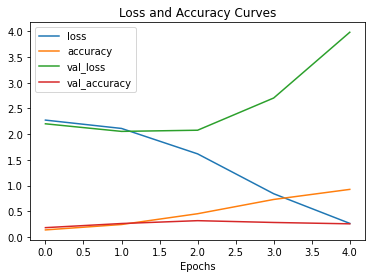

In [ ]:
#Check out the model's loss curves
plt.figure(figsize=(10,7))
pd.DataFrame(history_New.history).plot()
plt.title('Loss and Accuracy Curves')
plt.xlabel('Epochs')


**Overfitting, AGAIN**

### Adjust model hyperparameters to beat overfitting

* Increase data
* Reduce model complexity
* Use data augmentation


In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### Model with less complexity

In [ ]:
#Create Model (We are mimicking the CNN explainer website hosted CNN)
model_7= Sequential([
                     Conv2D(filters=10, 
                            kernel_size=3,
                            activation='relu',
                            strides=1,
                            input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2 ),
                     Conv2D(10,3,1, activation='relu'),
                     MaxPool2D(pool_size=2 ),
                     Flatten(),
                     Dense(10, activation='softmax') #10 output neurons corresponding to 10 output classes
                     
                     
])
#compile model
model_7.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 29160)             0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
#fit model

history_New_2= model_7.fit(train_data,
                         epochs=5,
                         steps_per_epoch= len(train_data),
                         validation_data= test_data,
                         validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 215ms/step - loss: 2.0790 - accuracy: 0.2560 - val_loss: 1.9510 - val_accuracy: 0.3108
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 1.6997 - accuracy: 0.4349 - val_loss: 1.9164 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 53s 227ms/step - loss: 1.2663 - accuracy: 0.5963 - val_loss: 2.1013 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 45s 194ms/step - loss: 0.7618 - accuracy: 0.7720 - val_loss: 2.3975 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.3859 - accuracy: 0.8931 - val_loss: 2.9416 - val_accuracy: 0.2824


Text(0.5, 0, 'Epochs')

<Figure size 720x504 with 0 Axes>

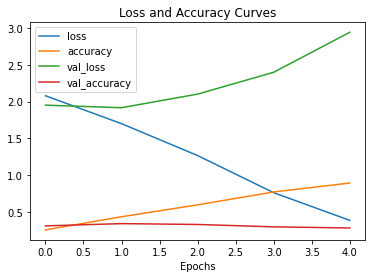

In [ ]:
#Check out the model's loss curves
plt.figure(figsize=(10,7))
pd.DataFrame(history_New_2.history).plot()
plt.title('Loss and Accuracy Curves')
plt.xlabel('Epochs')

### Data Augmentation 

In [ ]:
train_datagen_multiclass_augmented= ImageDataGenerator(rescale= 1/255,
                                                    shear_range=0.2,
                                                    rotation_range=0.2,
                                                    horizontal_flip= True,
                                                    )
test_datagen_multiclass_augmented= ImageDataGenerator(rescale= 1/255,
                                                    shear_range=0.2,
                                                    rotation_range=0.2,
                                                    horizontal_flip= True,
                                                    )

In [ ]:
train_data_multi_augmented= train_datagen_multiclass_augmented.flow_from_directory(train_dir,
                                                                                   target_size=(224,224),
                                                                                   class_mode='categorical',
                                                                                   batch_size=32,
                                                                                   )
test_data_multi_augmented= test_datagen_multiclass_augmented.flow_from_directory(train_dir,
                                                                                   target_size=(224,224),
                                                                                   class_mode='categorical',
                                                                                   batch_size=32,
                                                                                   )

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [ ]:
#model_new= tf.keras.models.clone_model(model_old)

In [ ]:
history_New_3= model_6.fit(train_data_multi_augmented, epochs=5,
            steps_per_epoch=len(train_data_multi_augmented),
            validation_data= test_data_multi_augmented,
            validation_steps= len(test_data_multi_augmented))

Epoch 1/5
235/235 [==============================] - 220s 936ms/step - loss: 0.2798 - accuracy: 0.9323 - val_loss: 0.1850 - val_accuracy: 0.9611
Epoch 2/5
235/235 [==============================] - 197s 839ms/step - loss: 0.1839 - accuracy: 0.9529 - val_loss: 0.1343 - val_accuracy: 0.9713
Epoch 3/5
235/235 [==============================] - 196s 833ms/step - loss: 0.1404 - accuracy: 0.9657 - val_loss: 0.1084 - val_accuracy: 0.9748
Epoch 4/5
235/235 [==============================] - 196s 834ms/step - loss: 0.1066 - accuracy: 0.9749 - val_loss: 0.0720 - val_accuracy: 0.9833
Epoch 5/5
235/235 [==============================] - 203s 865ms/step - loss: 0.0971 - accuracy: 0.9753 - val_loss: 0.0532 - val_accuracy: 0.9867


Text(0.5, 0, 'Epochs')

<Figure size 720x504 with 0 Axes>

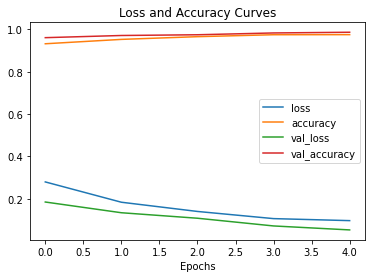

In [ ]:
#Check out the model's loss curves
plt.figure(figsize=(10,7))
pd.DataFrame(history_New_3.history).plot()
plt.title('Loss and Accuracy Curves')
plt.xlabel('Epochs')

PERFECT CNN MODEL.

In [ ]:
#Reconfigure predict class function for multi class case
def predictClassMulti(model, filename, class_names=class_names):
  #prep iamge
  img= load_prep_image(filename)
  #make prediction
  pred_probability= model.predict(tf.expand_dims(img, axis=0))
  #get predicted class
  pred_class=class_names[pred_probability.argmax()]
  #plot
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


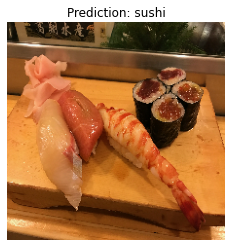

In [ ]:
predictClassMulti(model=model_6, filename= '03-sushi.jpeg', class_names=class_names)

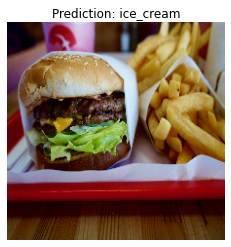

In [ ]:
predictClassMulti(model=model_6, filename= '03-hamburger.jpeg', class_names=class_names)

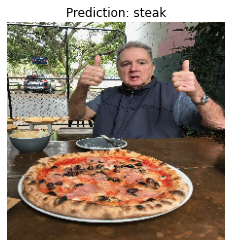

In [ ]:
predictClassMulti(model=model_6, filename= '03-pizza-dad.jpeg', class_names=class_names)

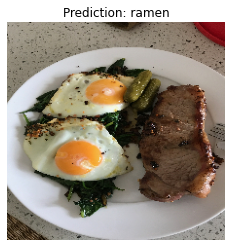

In [ ]:
predictClassMulti(model=model_6, filename= '03-steak.jpeg', class_names=class_names)

# Saving and loading our model 

In [ ]:
#Save
model_6.save('MultiClass_CNN_Classification')


INFO:tensorflow:Assets written to: MultiClass_CNN_Classification/assets


In [ ]:
#Load a trained model and evaluate it
loaded_model= tf.keras.models.load_model('MultiClass_CNN_Classification')

In [ ]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 18s 220ms/step - loss: 5.4318 - accuracy: 0.3080


[5.431822776794434, 0.30799999833106995]

In [ ]:
model_6.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 5.4318 - accuracy: 0.3080


[5.431822776794434, 0.30799999833106995]

In [ ]:
model_6.evaluate(test_data_multi_augmented)

235/235 [==============================] - 102s 432ms/step - loss: 0.0550 - accuracy: 0.9859


[0.05502530187368393, 0.9858666658401489]